# <a id='toc1_'></a>[Airbnb Vancouver: 1_Data preprocessiong](#toc0_)

Nima - nimachinikar@gmail.com - June 30th, 2023  


**Table of contents**<a id='toc0_'></a>    
- [Airbnb Vancouver: 1_Data preprocessiong](#toc1_)    
- [1. Intro ](#toc2_)    
  - [1.1. Key Questions](#toc2_1_)    
  - [1.2. Assumptions and Methods](#toc2_2_)    
  - [1.3. Setup and Data Collection](#toc2_3_)    
  - [1.4. Overview Data](#toc2_4_)    
- [2. Missing Data](#toc3_)    
  - [2.1 Inventory](#toc3_1_)    
  - [2.2 Dealing with missing data](#toc3_2_)    
    - [2.2.1. Creating binary columns ](#toc3_2_1_)    
    - [2.2.2. Missing first and last review ](#toc3_2_2_)    
    - [2.2.3. Missing reviews_per_month ](#toc3_2_3_)    
    - [2.2.4. Missing review_scores_rating ](#toc3_2_4_)    
    - [2.2.5. Missing host_acceptance_rate ](#toc3_2_5_)    
    - [2.2.6. Missing Bedrooms  ](#toc3_2_6_)    
      - [2.2.6.1. Are they studios ?  ](#toc3_2_6_1_)    
      - [2.2.6.2. Capturing when digit + key words  ](#toc3_2_6_2_)    
      - [2.2.6.3. Capturing when letters + key words ?  ](#toc3_2_6_3_)    
      - [2.2.6.4. Bedrooms and beds when private room  ](#toc3_2_6_4_)    
      - [2.2.6.5. Bedrooms and Camper/ RV  ](#toc3_2_6_5_)    
      - [2.2.6.6.  Bedrooms in Entire appartment with One Bed  ](#toc3_2_6_6_)    
    - [2.2.7 Transforming dataset  ](#toc3_2_7_)    
    - [2.2.8 Filling empty cells with the mean value by category  ](#toc3_2_8_)    
    - [2.2.9 Missing bathrooms_text  ](#toc3_2_9_)    
    - [2.2.10  Missing host_response_time  ](#toc3_2_10_)    
    - [2.2.11. Missing host_response_rate and host_acceptance_rate  ](#toc3_2_11_)    
  - [2.3 New Inventory ](#toc3_3_)    
- [3. Transformation](#toc4_)    
  - [3.1. Percentage to Float ](#toc4_1_)    
  - [3.2. T/F by 1/0 ](#toc4_2_)    
  - [3.3. Removing $ from 'Amount' ](#toc4_3_)    
  - [3.4. Feature Engineering ](#toc4_4_)    
  - [3.4.1. Amenities ](#toc4_5_)    
  - [3.4.2. Host Verifications ](#toc4_6_)    
- [4. Save transformation](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[1. Intro ](#toc0_)

## <a id='toc2_1_'></a>[1.1. Key Questions](#toc0_)

I've used Vancouver'Airbnb data from http://insideairbnb.com/vancouver/. I'll use this dataset to learn the pattern of the price with the aim to develop a model to predict it. 

The work is divided in:
- a config file
- Date Pre Processing
- EDA
- Modeling
- (Model comparison)

This specific file will focus on cleaning the dataset and filling the missing values. Some assumption are made along the development, they are summurize in the next point and repeated within the code when there is a code applying them.

## <a id='toc2_2_'></a>[1.2. Assumptions and Methods](#toc0_)

- A host is considered as having never accepted a guest, when availability_365 = 365 and property has no review
- No 2 private rooms can be rented within the same listing
- Camper/RV has no room
- Tthere is only one bedroom if there is one bed  


## <a id='toc2_3_'></a>[1.3. Setup and Data Collection](#toc0_)



In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
from collections import Counter

In [176]:
# Load the data
df = pd.read_csv('../../Users/Nima/Downloads/listings.csv')

In [177]:
# Read and execute the contents of "other_file.py"
exec(open('..\\..\\GitHub\\Capstone\\0_config.py').read())


## <a id='toc2_4_'></a>[1.4. Overview Data](#toc0_)



In [178]:
#Visualize Data
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13358,https://www.airbnb.com/rooms/13358,20230314070648,2023-03-14,city scrape,Designer Styled One Bedroom Downtown Vancouver,<b>The space</b><br />This suites central loca...,NaN,https://a0.muscache.com/pictures/40034c18-0837...,52116,...,4.80,4.92,4.68,22-311727,f,1,1,0,0,2.86
1,13490,https://www.airbnb.com/rooms/13490,20230314070648,2023-03-14,city scrape,Vancouver's best kept secret,This apartment rents for one month blocks of t...,"In the heart of Vancouver, this apartment has ...",https://a0.muscache.com/pictures/73394727/79d5...,52467,...,4.97,4.78,4.88,NaN,f,1,1,0,0,0.67
2,14267,https://www.airbnb.com/rooms/14267,20230314070648,2023-03-14,previous scrape,EcoLoft Vancouver,"The Ecoloft is located in the lovely, family r...",We live in the centre of the city of Vancouver...,https://a0.muscache.com/pictures/3646de9b-934e...,56030,...,4.68,4.77,4.71,21-156500,t,1,1,0,0,0.22
3,14424,https://www.airbnb.com/rooms/14424,20230314070648,2023-03-14,city scrape,Spacious one-bedroom in sought-after Strathcona,<b>The space</b><br />Welcome to Strathcona --...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,56709,...,4.72,4.60,4.74,19-162091,f,4,4,0,0,1.66
4,16254,https://www.airbnb.com/rooms/16254,20230314070648,2023-03-14,city scrape,Close to PNE/Hastings Park Garden level suite,2 Bedroom garden level guest suite.(lower leve...,"Good Eats, Cute Shops and all the personality ...",https://a0.muscache.com/pictures/d0cdc9b4-5937...,63238,...,5.00,4.86,4.29,19-162421,f,1,1,0,0,0.12


In [179]:
# Data Size
df.shape

(5975, 75)

In [180]:
# getting informations on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5975 non-null   int64  
 1   listing_url                                   5975 non-null   object 
 2   scrape_id                                     5975 non-null   int64  
 3   last_scraped                                  5975 non-null   object 
 4   source                                        5975 non-null   object 
 5   name                                          5975 non-null   object 
 6   description                                   5950 non-null   object 
 7   neighborhood_overview                         3996 non-null   object 
 8   picture_url                                   5975 non-null   object 
 9   host_id                                       5975 non-null   i

In [181]:
# checking that we don't have duplicated rows in the dataset:
print("duplicated rows: ", df.duplicated().sum())

duplicated rows:  0


# <a id='toc3_'></a>[2. Missing Data](#toc0_)

This section will take care of missing data


The following chart, will display the columns with missing values

## <a id='toc3_1_'></a>[2.1 Inventory](#toc0_)

In this section we will have an overview of the missing columns and we will select reliable and valuable columns for our investigation


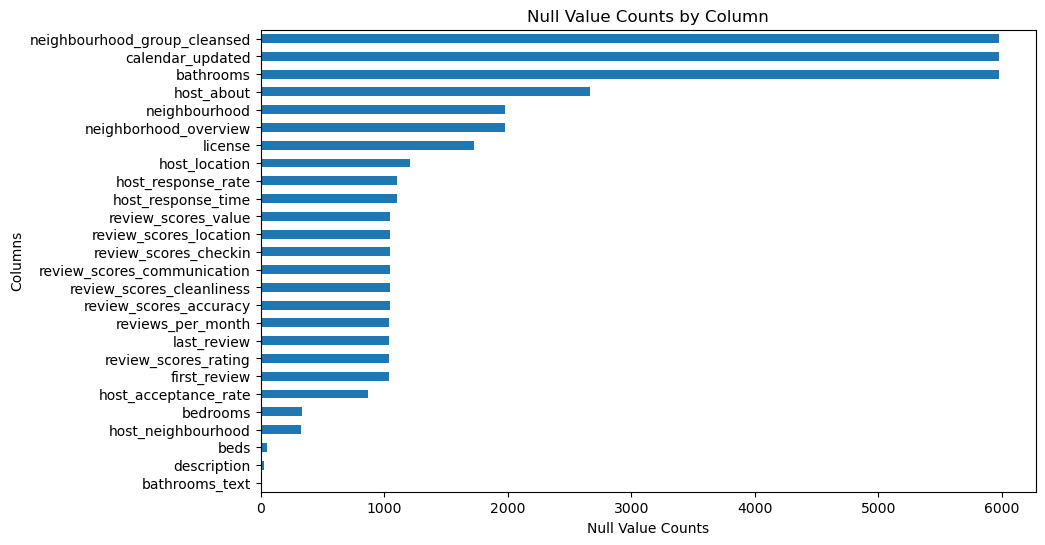

In [182]:
null_counts = df.isnull().sum()
null_counts=null_counts[null_counts > 0].sort_values(ascending=True)    

## Plotting null value 
plt.figure(figsize=(10, 6))
null_counts.plot(kind='barh')
plt.title('Null Value Counts by Column')
plt.xlabel('Null Value Counts')
plt.ylabel('Columns')
plt.show()     

Our aim is to predict the price of the Airbnb. We will drop some columns, by line this is the reason:
-  no business meaning
-  columns with a large majority of null values                    
- no metadata: (although review_scores_rating does have a metadata, I kept it and I interprate it as the score of the reviews given by customers)
 - redundant information

In [183]:
columns_to_drop = [ 'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url', 'host_thumbnail_url', 'host_url', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped','last_scraped', 'license', 'listing_url',  'picture_url', 'scrape_id', 'source', \
                    'bathrooms', 'calendar_updated', 'neighbourhood_group_cleansed', \
                    'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'has_availability', \
                    'neighbourhood','maximum_maximum_nights', 'maximum_minimum_nights',  'maximum_nights_avg_ntm',  'minimum_maximum_nights', 'minimum_minimum_nights',  'minimum_nights_avg_ntm',  'number_of_reviews_l30d']

df_subset = df.drop(columns=columns_to_drop, axis=1)

# Data Size
df_subset.shape

(5975, 40)

## <a id='toc3_2_'></a>[2.2 Dealing with missing data](#toc0_)

In this section we will address the missing data

### <a id='toc3_2_1_'></a>[2.2.1. Creating binary columns ](#toc0_)

In this section we will replace the column with missing data with 1-0 if the info exists or not

In [184]:
# 'Does column X have a description y/n?' for several columns:
columns_to_replace = ['name','description','host_about', 'neighborhood_overview']

for column in columns_to_replace:
    is_info_completed(column)

### <a id='toc3_2_2_'></a>[2.2.2. Missing first and last review ](#toc0_)

If there is no first and last review, then replace nan with fake date (1900/01/01)

In [185]:
df_subset.loc[(df_subset['first_review'].isnull()) & (df_subset['last_review'].isnull()),\
              ['first_review', 'last_review']] = '1900-01-01'

### <a id='toc3_2_3_'></a>[2.2.3. Missing reviews_per_month ](#toc0_)

If there is no first review and reviews_per_month is null then replace reviews_per_month by 0

In [186]:
# Keeping the 2nd condition (here below), allows for a second validation our logic (first validation is to confirm what has been changed)
df_subset.loc[(df_subset.first_review=='1900-01-01') & (df_subset.reviews_per_month.isnull()),\
              ['reviews_per_month']]=0

#Validating that: there isn't a case where we have a reviews_per_month >0 with a fake first_review date (expected result = 0)
df_subset.loc[(df_subset['first_review'] == '1900-01-01') &  (df_subset['reviews_per_month'] > 0)].nunique().sum()

0

### <a id='toc3_2_4_'></a>[2.2.4. Missing review_scores_rating ](#toc0_)

If there is no first review and review_scores_rating is null then replace review_scores_rating by 'no review'

In [187]:
df_subset.loc[(df_subset.first_review=='1000-01-01') & (df_subset.review_scores_rating.isnull()),\
              ['review_scores_rating']]='No review'

### <a id='toc3_2_5_'></a>[2.2.5. Missing host_acceptance_rate ](#toc0_)

/!\ Assumption: a host is considered as having never accepted a guest, when availability_365 = 365 and property has no review

In [188]:
df_subset.loc[(df_subset['host_acceptance_rate'].isnull()) & (df_subset['availability_365']==365) & (df_subset['number_of_reviews']==0),\
              ['host_acceptance_rate']]=0

### <a id='toc3_2_6_'></a>[2.2.6. Missing Bedrooms  ](#toc0_)

Finding bedrooms quantity from different columns?

#### <a id='toc3_2_6_1_'></a>[2.2.6.1. Are they studios ?  ](#toc0_)

Use of the columns 'name' and 'description' to gather information the type of property - Does it mention studio/ bachelor / NoBedroom ?

In [189]:
# Define the regex pattern
pattern = r'(?i)\b(?:[sS]tudio|[bB]achelor|[nN]o\s*[bB]edroom)\b'

# Spotting rows having our pattern in two different columns
df_studio1 = df[df['bedrooms'].isnull() & df['name'].str.contains(pattern, case=False, regex=True)]
df_studio2 = df[df['bedrooms'].isnull() & df['description'].str.contains(pattern, case=False, regex=True)]

# Merging the two df and dropping duplicates
df_studio = pd.concat([df_studio1[['id']], df_studio2[['id']]]).drop_duplicates()

# Create a boolean mask to identify matching 'id' values between df_subset and df_studio
matching_ids = df_subset['id'].isin(df_studio['id'])

# Replace 'bedroom' values with 0 where 'id' matches and bedroom is null
df_subset.loc[(matching_ids) & (df_subset.bedrooms.isnull()), 'bedrooms'] = 0

#### <a id='toc3_2_6_2_'></a>[2.2.6.2. Capturing when digit + key words  ](#toc0_)

Use of the columns 'name' and 'description' to gather information the type of property - Does it say # + bedroom(s)/ bd(s) / bdr(s)?

In [190]:
# Define pattern
pattern = r'(?i)\b\d+\s*(?:bdrs?|[bB]edrooms?)\b'

# Spotting rows having our pattern in two different columns
df_studio1 = df[(df['bedrooms'].isnull()) & df['name'].str.contains(pattern, case=False, regex=True)]
df_studio2 = df[(df.bedrooms.isnull()) & df['description'].str.contains(pattern, case=False, regex=True)]

# Create a new column 'bedroom_count' and extract the numeric value from several columns
df_studio1['bedroom_count'] = df_studio1['name'].str.extract(r'(?i)\b(\d+)\s*(?:bdrs?|[bB]edrooms?|bds?)\b')
df_studio2['bedroom_count'] = df_studio2['description'].str.extract(r'(?i)\b(\d+)\s*(?:bdrs?|[bB]edrooms?|bds?)\b')

# Merging the two df with matching patterns
df_studio = pd.concat([df_studio1[['id','bedroom_count']], df_studio2[['id','bedroom_count']]]).drop_duplicates()

# Convert the 'bedroom_count' column to integer type
df_studio['bedroom_count'] = df_studio['bedroom_count'].astype(int)

#In case there are different value in the different columns
df_studio = df_studio.groupby('id')['bedroom_count'].agg(max_bedroom_count='max').reset_index()

# Create a boolean mask to identify matching 'id' values between df_subset and df_studio
matching_ids = df_subset['id'].isin(df_studio['id'])

# Replace 'bedroom' values with n where 'id' matches and bedroom is null
df_subset.loc[matching_ids & df_subset['bedrooms'].isnull(), 'bedrooms'] = df_subset.loc[matching_ids & df_subset['bedrooms'].isnull(), 'id'].map(df_studio.set_index('id')['max_bedroom_count'])

C:\Users\Nima\AppData\Local\Temp\ipykernel_9416\3026306924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_studio1['bedroom_count'] = df_studio1['name'].str.extract(r'(?i)\b(\d+)\s*(?:bdrs?|[bB]edrooms?|bds?)\b')
C:\Users\Nima\AppData\Local\Temp\ipykernel_9416\3026306924.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_studio2['bedroom_count'] = df_studio2['description'].str.extract(r'(?i)\b(\d+)\s*(?:bdrs?|[bB]edrooms?|bds?)\b')


#### <a id='toc3_2_6_3_'></a>[2.2.6.3. Capturing when letters + key words ?  ](#toc0_)

Use of the columns 'name' and 'description' to gather information the type of property - Does it mention # in LETTER + key words ? 

In [191]:
# Define pattern
pattern = r'\b(?:one|two|three|four|five|six|seven|eight|nine|ten)\s*(?:bdrs?|[bB]edrooms?)\b'

# Spotting rows having our pattern in two different columns
df_studio1 = df[(df['bedrooms'].isnull()) & df['name'].str.contains(pattern, case=False, regex=True)]
df_studio2 = df[(df.bedrooms.isnull()) & df['description'].str.contains(pattern, case=False, regex=True)]

# Create a new column 'bedroom_count' and extract the numeric value from several columns
df_studio1['bedroom_count'] = df_studio1['name'].str.extract(r'\b(one|two|three|four|five|six|seven|eight|nine|ten)\b', flags=re.IGNORECASE)
df_studio2['bedroom_count'] = df_studio2['description'].str.extract(r'\b(one|two|three|four|five|six|seven|eight|nine|ten)\b', flags=re.IGNORECASE)

# Merging the two df with matching patterns
df_studio = pd.concat([df_studio1[['id','bedroom_count']], df_studio2[['id','bedroom_count']]]).drop_duplicates()

#Transforming characters to int
number_mapping = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10
}

#Applying the transformation
df_studio['bedroom_count'] = df_studio['bedroom_count'].str.lower().map(number_mapping)

#In case there are different value in the different columns
df_studio = df_studio.groupby('id')['bedroom_count'].agg(max_bedroom_count='max').reset_index()

# Create a boolean mask to identify matching 'id' values between df_subset and df_studio
matching_ids = df_subset['id'].isin(df_studio['id'])

# Replace 'bedroom' values with n where 'id' matches and bedroom is null
df_subset.loc[matching_ids & df_subset['bedrooms'].isnull(), 'bedrooms'] = df_subset.loc[matching_ids & df_subset['bedrooms'].isnull(), 'id'].map(df_studio.set_index('id')['max_bedroom_count'])

C:\Users\Nima\AppData\Local\Temp\ipykernel_9416\2246438486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_studio1['bedroom_count'] = df_studio1['name'].str.extract(r'\b(one|two|three|four|five|six|seven|eight|nine|ten)\b', flags=re.IGNORECASE)
C:\Users\Nima\AppData\Local\Temp\ipykernel_9416\2246438486.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_studio2['bedroom_count'] = df_studio2['description'].str.extract(r'\b(one|two|three|four|five|six|seven|eight|nine|ten)\b', flags=re.IGNORECASE)


#### <a id='toc3_2_6_4_'></a>[2.2.6.4. Bedrooms and beds when private room  ](#toc0_)

Set 'bedrooms' and beds to 1 when private room 
/!\ Assumption no 2 private rooms can be rented within the same listing

In [192]:
df_subset['bedrooms'] = np.where((df_subset['bedrooms'].isnull()) & (df_subset['room_type'] == 'Private room'), 1, df_subset['bedrooms'])
df_subset['beds'] = np.where(df_subset['room_type'] == 'Private room', 1, df['beds'])

#### <a id='toc3_2_6_5_'></a>[2.2.6.5. Bedrooms and Camper/ RV  ](#toc0_)
/!\ Assumption Camper/RV has no room

In [193]:
df_subset['bedrooms'] = np.where((df_subset['property_type'] == 'Camper/RV'), 0, df_subset['bedrooms'])

#### <a id='toc3_2_6_6_'></a>[2.2.6.6.  Bedrooms in Entire appartment with One Bed  ](#toc0_)
/!\ Assumption there is only one bedroom if there is one bed  

In [194]:
df_subset['bedrooms'] = np.where((df_subset['beds'] == 1) & (df_subset['room_type'].str.contains('Entire') & df_subset['bedrooms'].isnull() ), 1, df_subset['bedrooms'])

### <a id='toc3_2_7_'></a>[2.2.7 Transforming dataset  ](#toc0_)

In [200]:
## 1) object to date
df_subset['first_review'] = pd.to_datetime(df_subset['first_review'])
df_subset['last_review'] = pd.to_datetime(df_subset['last_review'])
df_subset['host_since'] =  pd.to_datetime(df_subset['host_since'])

## 2) Extracting bathrooms value
df_subset['bathrooms'] = df_subset['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)')[0]
df_subset['bathrooms']=df_subset['bathrooms'].astype(float)

## 3) 'Half-bath' to numeric
df_subset.loc[df_subset['bathrooms_text'] == 'Shared half-bath', 'bathrooms'] = 0.5
df_subset.loc[df_subset['bathrooms_text'] == 'Private half-bath', 'bathrooms'] = 0.5

### <a id='toc3_2_8_'></a>[2.2.8 Filling empty cells with the mean value by category  ](#toc0_)

In [201]:
proxy_mean('bedrooms','property_type')            
proxy_mean('beds','property_type')
proxy_mean('bathrooms','bedrooms',1)

### <a id='toc3_2_9_'></a>[2.2.9 Missing bathrooms_text  ](#toc0_)
Replacing missing bathrooms_text with bathrooms type

In [202]:
## Creating bathroom_type from bathrooms_text info and completing it
df_subset['bathroom_type'] = df_subset['bathrooms_text'].str.extract(r'\d+\s+(.+)')
df_subset['bathroom_type'] = df_subset['bathroom_type'].apply(lambda x: 'private' if 'private' in str(x).lower() else
                                                          'shared' if 'shared' in str(x).lower() else
                                                          'shared')
# Adusting for private location (from the 'else' statement it was assigned to shared in the previous code)
df_subset.loc[df['room_type'] == 'Entire home/apt','bathroom_type'] = 'private'
# /!\ Assumption if there are at least the same amount of bathrooms and bedrooms, the host will privatize one bathroom
df_subset.loc[df['bathrooms'] >= df_subset['bedrooms'], 'bathroom_type'] = 'private'

#dropping bathrooms_text
df_subset=df_subset.drop('bathrooms_text',axis=1)


### <a id='toc3_2_10_'></a>[2.2.10  Missing host_response_time  ](#toc0_)

In [203]:
host_na = df[df.host_response_rate.isnull()]['host_id'].drop_duplicates()
host_isonly_na = df[df.host_id.isin(host_na)]['host_id'].drop_duplicates()

# If there isn't the same host_id with different values then
if host_na.nunique() == host_isonly_na.nunique():
    # Replacing host_response_time with 'unknown' when null
    df_subset.loc[df_subset['host_response_time'].isnull(), 'host_response_time'] = 'unknown'
    print('Replacing host_response_time with unknown when null')
else:
    print('There is at least one host with several distinct values regarding his host_response_time')

Replacing host_response_time with unknown when null


### <a id='toc3_2_11_'></a>[2.2.11. Missing host_response_rate and host_acceptance_rate  ](#toc0_)
/!\ Assumption: when the property is available all year and the host response rate and host acceptance rate are nan, the host isn't proactively trying to rent his/ her property --> to 0

In [204]:
df_subset.loc[(df_subset.availability_365==365) & (df_subset.host_response_rate.isnull()) , 'host_response_rate'] = 0
df_subset.loc[(df_subset.availability_365==365) & (df_subset.host_acceptance_rate.isnull()) , 'host_acceptance_rate'] = 0

## <a id='toc3_3_'></a>[2.3 New Inventory ](#toc0_)

In [205]:
### Missing value: check 
null_counts = df_subset.isnull().sum()
print(null_counts[null_counts > 0].sort_values(ascending=True))   

host_acceptance_rate     819
review_scores_rating    1035
host_response_rate      1055
dtype: int64


I will do the EDA with as is. However I will replace with the missing value, with the mean for the modeling


# <a id='toc4_'></a>[3. Transformation](#toc0_)

In this section, we will perform some statistical analysis on the data.


In [206]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         5975 non-null   int64         
 1   name                       5975 non-null   int32         
 2   description                5975 non-null   int32         
 3   neighborhood_overview      5975 non-null   int32         
 4   host_id                    5975 non-null   int64         
 5   host_since                 5975 non-null   datetime64[ns]
 6   host_about                 5975 non-null   int32         
 7   host_response_time         5975 non-null   object        
 8   host_response_rate         4920 non-null   object        
 9   host_acceptance_rate       5156 non-null   object        
 10  host_is_superhost          5975 non-null   object        
 11  host_listings_count        5975 non-null   int64         
 12  host_t

## <a id='toc4_1_'></a>[3.1. Percentage to Float ](#toc0_)

In [207]:
columns_to_process = ['host_response_rate', 'host_acceptance_rate']

for column in columns_to_process:
    df_subset[column] = df_subset[column].str.replace('%', '').str.strip().astype('float')

## <a id='toc4_2_'></a>[3.2. T/F by 1/0 ](#toc0_)

In [208]:
columns_to_map = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

for column in columns_to_map:
    df_subset[column] = df_subset[column].map({'t': 1, 'f': 0})

## <a id='toc4_3_'></a>[3.3. Removing $ from 'Amount' ](#toc0_)

In [209]:
df_subset['price'] = df_subset['price'].str.replace('$', '').str.replace(',', '').str.strip().astype('float')

C:\Users\Nima\AppData\Local\Temp\ipykernel_9416\2962534890.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_subset['price'] = df_subset['price'].str.replace('$', '').str.replace(',', '').str.strip().astype('float')


## <a id='toc4_4_'></a>[3.4. Feature Engineering ](#toc0_)

### <a id='toc4_5_'></a>[3.4.1. Amenities ](#toc0_)
We will be encoding the columns Amenities into new columns for each values in amenity. The new columns will have 1 or 0, that represent whether or not this amenity is provided. Then delete the column 'Amenities' since it's not needed anymore.

In [210]:
df_subset['amenities'].head()

## make a dictionary from the amenities
amenities_counter = Counter()

## delete {},"",/,\, and split them by comma
df_subset['amenities'].astype(str).str.strip('{}') \
                                .str.replace('"', '') \
                                .replace(r'\\u\d+', '', regex=True) \
                                .str.lstrip('\"') \
                                .str.rstrip('\"') \
                                .str.replace(r'\d+\\?\s', '', regex=True) \
                                .str.replace('\\', '') \
                                .str.replace(']', '') \
                                .str.replace('[', '') \
                                .str.split(',') \
                                .apply(amenities_counter.update)

## Removing leading space and grouping similar amenities
amenities_df = pd.DataFrame.from_dict(amenities_counter, orient='index').reset_index()
amenities_df.columns = ['amenity', 'count']
amenities_df['amenity'] = amenities_df['amenity'].astype(str).str.strip()
amenities_df = amenities_df.groupby('amenity')['count'].sum()
amenities_counter = Counter(amenities_df.to_dict())

## check how many amenities we have in total
print(len(amenities_counter))

## print the most common items
amenities_counter.most_common(10)

# for the purpose of the project I'll take only the most 30 common amenities
for item,_ in amenities_counter.most_common(30):
    col_name = 'amenity_' + item.replace(" ", "_")
    col_name = col_name.lower()
    df_subset[col_name] = df_subset['amenities'].astype('str').apply(lambda x: int(item in x))

## Visualizing new columns
df_subset.info()

C:\Users\Nima\AppData\Local\Temp\ipykernel_9416\1210488089.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_subset['amenities'].astype(str).str.strip('{}') \


1589


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 71 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  5975 non-null   int64         
 1   name                                5975 non-null   int32         
 2   description                         5975 non-null   int32         
 3   neighborhood_overview               5975 non-null   int32         
 4   host_id                             5975 non-null   int64         
 5   host_since                          5975 non-null   datetime64[ns]
 6   host_about                          5975 non-null   int32         
 7   host_response_time                  5975 non-null   object        
 8   host_response_rate                  4868 non-null   float64       
 9   host_acceptance_rate                5110 non-null   float64       
 10  host_is_superhost       

### <a id='toc4_6_'></a>[3.4.2. Host Verifications ](#toc0_)
Using the same concept as amenities

In [211]:
df_subset.host_verifications.head()

# make a dictionary from the host_verifications
verifications_counter = Counter()

# delete {},"",/,\
df_subset.host_verifications.astype('str').str.strip('{}')\
                                       .str.replace('"', '')\
                                       .str.replace("'", "") \
                                       .str.replace('[','')\
                                       .str.replace(']','')\
                                       .str.split(',')\
                                       .apply(verifications_counter.update)
                                       
# Removing leading space and grouping similar verification methods
verifications_df = pd.DataFrame.from_dict(verifications_counter, orient='index').reset_index()
verifications_df.columns = ['verification', 'count']
verifications_df['verification'] = verifications_df['verification'].astype(str).str.strip()
verifications_df = verifications_df.groupby('verification')['count'].sum()
verifications_counter = Counter(verifications_df.to_dict())

# check how many verification methods we have in total
print(len(verifications_counter))

# print the most common items
verifications_counter.most_common(10)

# I'll take only the most 10 common verifications
for item,_ in verifications_counter.most_common(10):
    col_name = 'host_verification_' + item.replace(" ", "_")
    df_subset[col_name] = df_subset.host_verifications.astype('str').apply(lambda x: int(item in x))

#Clean new columns name
df_subset.columns = df_subset.columns.str.replace('__', '_')

#Display columns
df_subset.info()


4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  5975 non-null   int64         
 1   name                                5975 non-null   int32         
 2   description                         5975 non-null   int32         
 3   neighborhood_overview               5975 non-null   int32         
 4   host_id                             5975 non-null   int64         
 5   host_since                          5975 non-null   datetime64[ns]
 6   host_about                          5975 non-null   int32         
 7   host_response_time                  5975 non-null   object        
 8   host_response_rate                  4868 non-null   float64       
 9   host_acceptance_rate                5110 non-null   float64       
 10  host_is_superhost     

C:\Users\Nima\AppData\Local\Temp\ipykernel_9416\2798630183.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_subset.host_verifications.astype('str').str.strip('{}')\



# <a id='toc5_'></a>[4. Save transformation](#toc0_)

In [212]:
df_subset.to_csv('../../GitHub/Capstone/1_dpp_airbnb_vancouver.csv', index=False)

In [213]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  5975 non-null   int64         
 1   name                                5975 non-null   int32         
 2   description                         5975 non-null   int32         
 3   neighborhood_overview               5975 non-null   int32         
 4   host_id                             5975 non-null   int64         
 5   host_since                          5975 non-null   datetime64[ns]
 6   host_about                          5975 non-null   int32         
 7   host_response_time                  5975 non-null   object        
 8   host_response_rate                  4868 non-null   float64       
 9   host_acceptance_rate                5110 non-null   float64       
 10  host_is_superhost       